# Over and underfitting in multilayer artificial neuron

<p style='text-align: justify;'> 
In this section, we will study the concepts of overfitting and underfitting in multilayer artificial neuron networks.
</p>

## Objectives

* **Understand** the concept of overfitting and underfitting in multilayer artificial neuron,
* **Learn and Explore** about the principles behind fitting problems.

## Introduction to fitting
<p style='text-align: justify;'> 
In specific models, we can observe that the training accuracy can reach a significantly high level, while the validation accuracy cannot get the same performance level.
</p>
<p style='text-align: justify;'> 
In other words, the term fitting refers to the ability of a neural network to find a good balance between the ability to generalize patterns and the ability to adapt to training data. However, depending on how the network is trained, it is possible for a model to memorize a data set without developing a comprehensive and versatile representation of the underlying problem. This prevalent problem is commonly known as overfitting. In this section, we will study how to minimize the effects of overfitting in a neural network.
</p>

## ☆ Challenge: Probability distribution in a 2D gaussian dataset ☆

<p style='text-align: justify;'> 
Let us create a sample of examples with two values $x_1$ and $x_2$, with two categories. For category $0$, the underlying probability distribution is 2D Gaussian centered on $(0,0)$, with width = $1$ along both directions. For category $1$, the Gaussian distribution is centered on $(1,1)$. We assign label $0$ to category $0$, and label $1$ to category $1$.
    </p>

### ⊗ Import Python packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(0xdeadbeef)

### ⊗ Create a dataset

<p style='text-align: justify;'>
Below, we provide the coordinates of the mean as a first argument, and then the covariance matrix, which describes the width of the Gaussian along the two directions. We generate nexamples examples for each category:
    </p>

In [2]:
def buildSample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    s2 = sigma**2.
    
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

### ⊗ Create the samples

<p style='text-align: justify;'>
Here, we create a tiny training sample with only $60$ examples per category and a test sample with $400$ examples per category. We are using such a small training sample because, as will be shown, small samples are vulnerable to overfitting.
</p>

In [3]:
sgx, sgy = buildSample(60)
tgx, tgy = buildSample(400)

<p style='text-align: justify;'>
Let's plot the samples. Note that we can plot the two categories together in one go by providing the label array as a color argument (c=sgy):
    </p>

Text(0, 0.5, 'x2')

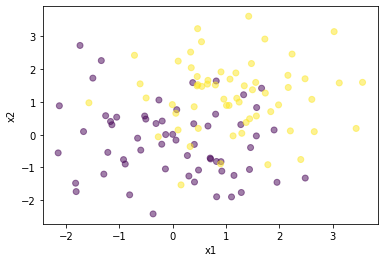

In [4]:
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### ⊗  Overfitting
<p style='text-align: justify;'>
Overfitting arises when a machine learning model excessively adjusts to the training data, memorizing specific examples rather than learning general patterns. This results in poor performance when dealing with new data, as the model becomes overly specialized to the training data. It is crucial to avoid overfitting by using larger datasets, regularization techniques, and cross-validation to build more robust and generalizable models.
</p>
<p style='text-align: justify;'>
Below, we can see a graph that illustrates the phenomenon of overfitting. The blue line represents the training process of the neural network. It is important to note that as the epochs progress, the loss coefficient decreases, indicating that the network is learning patterns during training. However, when we look at the red line, we can observe that when the network is exposed to validation data, which means data that was not seen during training, the network does not achieve the expected results, resulting in an increase in loss over the epochs. This indicates that the network is experiencing overfitting, where it "memorizes" the training data rather than learning the underlying patterns.
</p>

<div style="text-align:center">
<img src="./images/figure13_overfitting_graph.jpg" style="width: 500px;">
</div>

<p style='text-align: justify;'>
Let us create a neural network using scikit-learn. Here is an explanation of the parameters I use below:
</p>
* Three hidden layers with $50$ neurons each. We purposely chose this relatively complex setup to illustrate overfitting, which occurs when the model is too complex for the amount of data in the training sample,

* *ReLU* activation, because this activation function makes the training easier in neural nets with hidden layers,

* An increased maximum number of iterations so that the network has time to converge,

* A fixed random seed so that we get the same results as I do every time we run the code.

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=10000, random_state=1)

### ⊗ Visualization data

<p style='text-align: justify;'>
Let us define a small function to plot our results. The function will plot the examples in the two categories and the probability that an $(x_1, x_2)$ point belongs to category $1$ (black means that this probability is close to 1 and white to 0).
</p>

In [6]:
def plot_result(sample, targets, linrange=(-5,5,101)):
    xmin, xmax, npoints = linrange
    gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
    grid = np.c_[gridx1.flatten(), gridx2.flatten()]
    probs = mlp.predict_proba(grid)
    plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints), cmap='binary')
    plt.colorbar()
    plt.scatter(sample[:,0], sample[:,1], c=targets, cmap='plasma', alpha=0.5, marker='.')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

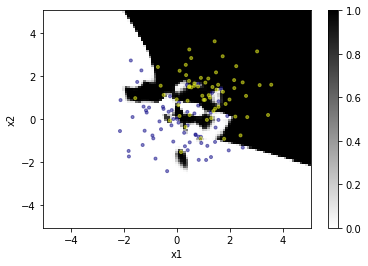

In [7]:
plot_result(sgx,sgy)

<p style='text-align: justify;'>
Here we can observe that the distribution is far from ideal. We see that at the frontier, the neural network does its best to follow the patterns of the training sample. It can do that because its many parameters make it flexible and adaptive. But let us see what happens if we plot the probability distribution with the larger test sample:
</p>

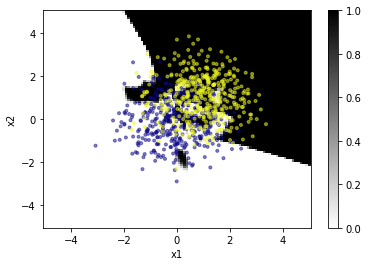

In [8]:
plot_result(tgx,tgy)

<p style='text-align: justify;'>
There are many examples that are classified in the wrong category. This neural network is very good with the training sample, but it has lost its generality and is thus useless in practice. <b>This is overfitting.</b>
    </p>

### ⊗ Mitigate overfitting
<p style='text-align: justify;'>
Now let us try again with a much more straightforward network, with a single layer with five neurons. This time, overfitting is much less of an issue. The network does not have enough parameters to follow the training sample's random patterns. Therefore, it behaves pretty well on the test sample. Let us try something else. We use the complex network this time, but we provide much more training data: $10,000$ examples per category instead of $60$.
</p>

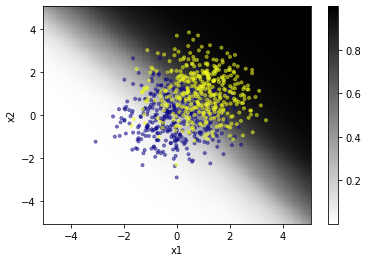

In [9]:
sgx, sgy = buildSample(10000)
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)
plot_result(tgx, tgy)

<p style='text-align: justify;'>
The network took a bit longer to train, but this time, there is enough training data to properly constrain the parameters of the network, and the classification performance is going to be good in general.
    </p>

### ⊗ Underfitting
<p style='text-align: justify;'> 
Underfitting as opposed to overfitting is a machine learning problem in which the model is unable to accurately capture the patterns and complexities present in the training data. This occurs when the model is too simple or has insufficient capacity to adequately represent the problem in question. 
</p>
<p style='text-align: justify;'>     
    As we can see in the following graph, the neural network is trained with limited data and performs relatively poorly. However, when the same network is exposed to validation data to verify if it indeed responds as expected, it ends up performing better than it did during training. It's as if a student hadn't studied anything but managed to answer most of the exam questions correctly. It doesn't make sense. This is precisely what happens in underfitting: the network performs better with the untrained data than with the data it was actually trained on.
    
<div style="text-align:center">
<img src="./images/figure14_underfitting_graph.jpg" style="width: 500px;">
</div>
    
</p>
<p style='text-align: justify;'> 
Let's build an exercise where it will be possible to visualize the underfiting problem during machine learning.
    </p>

In [10]:
sgxa, sgya = buildSample(1000, ([0.,0],[3.,3.]), 0.3)
sgxb, sgyb = buildSample(1000, ([1.,1],[4.,4.]), 0.3)
sgxc, sgyc = buildSample(1000, ([5.,5.],[-2.,-2.]), 0.6)
sgxd, sgyd = buildSample(1000, ([-1,3.],[3.,-1.]), 0.3)

sgx = np.concatenate([sgxa,sgxb,sgxc,sgxd])
sgy = np.concatenate([sgya,sgyb,sgyc,sgyd])

Text(0, 0.5, 'x2')

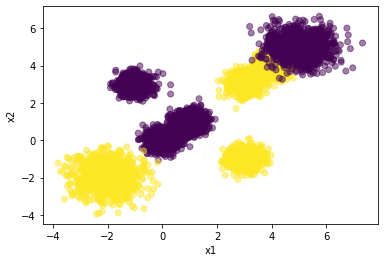

In [11]:
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

Now, let us build a small network and see if we can classify that.

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=10000, random_state=1)

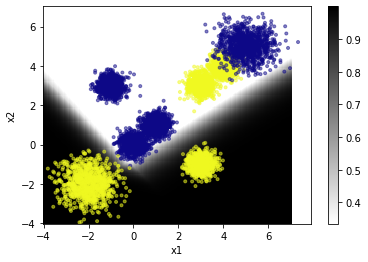

In [13]:
plot_result(sgx,sgy,linrange=(-4,7,201))

<p style='text-align: justify;'> 
    The network does not have enough parameters to fit the training data. <b>This is underfitting.</b> Still, it does quite an excellent job with its three neurons. Let us increase the number of neurons on the hidden layer a bit:
    </p>

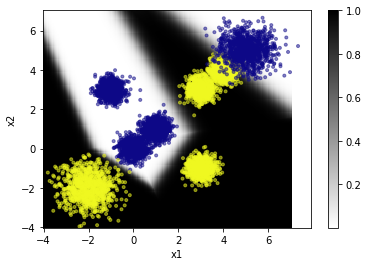

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)
plot_result(sgx,sgy,linrange=(-4,7,201))

Let us increase the complexity of the model even further:

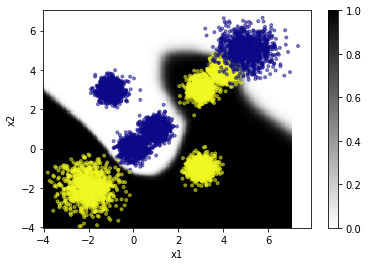

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', max_iter=10000, random_state=1)
mlp.fit(sgx,sgy)
plot_result(sgx,sgy,linrange=(-4,7,201))

Still needs to be more overfitting. The network now shows a smooth boundary and could adapt further if required.

## Summary

<p style='text-align: justify;'>
In this notebook we have shown: 

- How that overfitting and underfitting are important issues in multilayer artificial neuron,

- How to avoid overfitting and underfitting.
    
</p>    

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [16]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Next

Congratulations, you have completed the second part of the learning objectives of the course! As a final exercise, successfully complete an applied problem in the assessment in [_05-multilayer-artificial-neuron-classification-regression-assessment.ipynb_](05-multilayer-artificial-neuron-classification-regression-assessment.ipynb)